# Content based Recommender system using deep learning for an online e-commerce store

**Model Class:**    Unsupervised</br>
**Model Type:**     Recommendation system</br>

**Purpose**: Identifying products a specific customer likes and recommend it to the similar products can significantly increase the earnings of a company. For that purpose, a neural network classifier is used as a data-driven, visually-aware feature extractor. The latter then serves as input for similarity-based recommendations using a ranking algorithm. Combined with more traditional content-based recommendation systems, image-based recommendations can help to increase robustness and performance, for example, by better matching a customer style.

**Edit Date** : 23rd Dec 2019

- ##### **Recommendation model included in this notebook:**
    - Deep Learning Algorithms for Unsupervised Computer Vision
    - Transfer Learning using CNN Architectures
    - Similarity Matrix
    - Product ranking based on similarity
</br></br>
- **Resources**
    * https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
    * https://en.wikipedia.org/wiki/Cosine_similarity
    * https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
    * https://en.wikipedia.org/wiki/Recommender_system
     
</br>
- **Data**</br>
    - Created the data by crawling the google and extracting images of shirts from various sites


- **Goal**</br>
    - This recommender system will allow users to select a specific type of shirt and search for similar pattern of shirts from the inventory.
    
# Dependencies

Load the dependencies for model development. Current package requirements include:
* Keras
* Pandas
* Numpy
* Pickle
* Matplotlib
* Glob



In [1]:
#!pip install numpy
#!pip install tensorflow

In [1]:
# import libraries required for file operations
import os
import pickle
from glob import glob

# import basic numerical libraries
import numpy as np
import pandas as pd

# import keras libraries for image recognition

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as kimage

Using TensorFlow backend.


# Setting the local path 

In [2]:
#setting the base path 
import os
os.chdir('C:\\Users\\gagarwal030\\Documents\\content based recommendation\\CBRS-master')

In [ ]:
# unzip shirts folder from the directory
!unzip shirts.zip

# Load Data

### Read the data
* The first step is to import the dataset. Since we are dealing with unstructured data, specifically images, there are several ways to do this. The current notebook uses a dataset which is created by crawling the google to extract images of shirts.
* The images is stored in the shirt directory in the local system. 
* This code block is extracting the images and preprocessing it

In [3]:
# Create a dictionary of shirts for feeding to the image recognition model
shirts_dict = dict()
for shirt in glob('shirts/*.jpg'):  # load all shirts
  img = kimage.load_img(shirt, target_size=(224, 224))   # VGG accepts images in 224 X 224 pixels
  img = preprocess_input(np.expand_dims(kimage.img_to_array(img), axis=0))  # preprocessing the data
  id = shirt.split('/')[-1].split('.')[0]
  shirts_dict[id] = img  # map image & shirt id

In [4]:
#printing the total number of image data
no_of_shirts = len(shirts_dict.keys())
print('Number of shirts = {}'.format(no_of_shirts))

Number of shirts = 2908


# Deep learning model
* Using pretrained model on VGG16 using imagenet weights to extract feactures of the image
* Features of the images are extracted at the fully connect layer

In [6]:
# Train on the VGG Model
model = VGG16(include_top=False, weights='imagenet')
shirts_matrix = np.zeros([no_of_shirts, 25088])   # initialize the matrix with zeros

# Storing deep learning results in the dictionary

In [7]:
#Store the deep learning result in the dictionary
for i, (id, img) in enumerate(shirts_dict.items()):
  print(id)  
  shirts_matrix[i, :] = model.predict(img).ravel()  # flatten the matrix

shirts\1000
shirts\1001
shirts\1002
shirts\1003
shirts\1004
shirts\1005
shirts\1006
shirts\1007
shirts\1008
shirts\1009
shirts\1010
shirts\1011
shirts\1012
shirts\1013
shirts\1014
shirts\1015
shirts\1016
shirts\1017
shirts\1018
shirts\1019
shirts\1020
shirts\1021
shirts\1022
shirts\1023
shirts\1024
shirts\1025
shirts\1026
shirts\1027
shirts\1028
shirts\1029
shirts\1030
shirts\1031
shirts\1032
shirts\1033
shirts\1034
shirts\1035
shirts\1036
shirts\1037
shirts\1038
shirts\1039
shirts\1040
shirts\1041
shirts\1042
shirts\1043
shirts\1044
shirts\1045
shirts\1046
shirts\1047
shirts\1048
shirts\1049
shirts\1050
shirts\1051
shirts\1052
shirts\1053
shirts\1054
shirts\1055
shirts\1056
shirts\1057
shirts\1058
shirts\1059
shirts\1060
shirts\1061
shirts\1062
shirts\1063
shirts\1064
shirts\1065
shirts\1066
shirts\1067
shirts\1068
shirts\1069
shirts\1070
shirts\1071
shirts\1072
shirts\1073
shirts\1074
shirts\1075
shirts\1076
shirts\1077
shirts\1078
shirts\1079
shirts\1080
shirts\1081
shirts\1082
shir

In [8]:
#output the model result
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

# Similarity Matrix
* Create a corelation between shirts by using cosine similarity

![alt text](http://dataconomy.com/wp-content/uploads/2015/04/Five-most-popular-similarity-measures-implementation-in-python-4-620x475.png)

In [45]:
# Create a corelation between shirts by using cosine distance
dot_product = shirts_matrix.dot(shirts_matrix.T)
norms = np.array([np.sqrt(np.diagonal(dot_product))])
similarity = dot_product / (norms * norms.T)
print(similarity.shape)

(2908, 2908)


# Save the similarity matrix in the local

In [46]:
#save the results of the correlation of shirts in the local system
np.savetxt("similarity.csv", similarity, delimiter=",")

In [61]:
#print the total rows and columns of the dataset
print(similarity.shape)

(2908, 2908)


# Read the similarity matrix from the local
* This step prevent the process of creating similarity matrix again and again

In [8]:
#read the preprocess similarity matrix
similarity=np.loadtxt(open("C:\\Users\\gagarwal030\\Documents\\content based recommendation\\CBRS-master\\similarity.csv", "rb"), delimiter=",", skiprows=0)

# Create 2 dictionary 'matrix id to shirt id' and 'shirt id to matrix id'

![alt text](https://s3.ap-south-1.amazonaws.com/t.ctaram-aws-test-bucket/cross_reference.jpg)

In [9]:
# create a cross reference matrix with shirts and matrix
matrix_id_to_shirt_id = dict()
shirt_id_to_matrix_id = dict()
for i, (id, img) in enumerate(shirts_dict.items()):  
    matrix_id_to_shirt_id[i] = id
    shirt_id_to_matrix_id[id] = i

In [10]:
shirt_id_to_matrix_id['shirts\\1111'] # printing shirt id for the matrix id of shirts\\1111

111

# Assign target shirt for which all possible closest shirts must be extracted


In [11]:
# evaluate on shirt "1111"
target_shirt_id = 'shirts\\1121'
target_id = shirt_id_to_matrix_id[target_shirt_id]


In [12]:
target_id

121

# Sort the shirts based on the similarity from the target shirt
* Then choose the top 10 options for the recommendation

In [13]:
# Sort 10 shirts based on their closest corelation
closest_ids = np.argsort(similarity[target_id, :])[::-1][0:10]
closest_shirts = [matrix_id_to_shirt_id[matrix_id] for matrix_id in closest_ids]

# Print the closest 10 shirt ids from the target shirt


In [14]:
closest_shirts

['shirts\\2206',
 'shirts\\1121',
 'shirts\\2303',
 'shirts\\2175',
 'shirts\\2343',
 'shirts\\3597',
 'shirts\\1004',
 'shirts\\3852',
 'shirts\\2434',
 'shirts\\2635']

## Print the target shirt

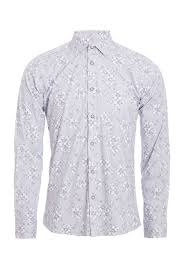

In [15]:
# Display the sample shirt
from IPython.display import Image
Image('shirts/1121.jpg')

## Print the top 10 closest shirt from the target shirt

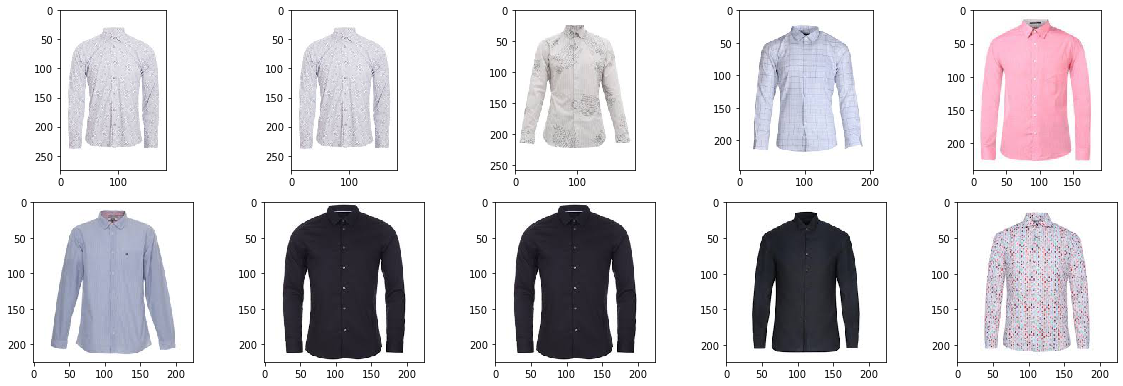

In [16]:
# Find top 10 closest shirts 
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []

for shirt in closest_shirts:
  shirt =shirt.lstrip(shirt[:7]) # extracting shrit index by removing the 1st 7 characters
  shirt = 'shirts/'+shirt+'.jpg' # creating name of the shirt by its index
  for img_path in glob.glob(shirt):        
      images.append(mpimg.imread(img_path))  # display image by the image name 

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)